In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-sales-data/Amazon Sales data.csv


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
amz_sales_data_df = pd.read_csv('/kaggle/input/amazon-sales-data/Amazon Sales data.csv')

In [4]:
amz_sales_data_df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,? 255.28,? 159.42,"? 25,33,654.00","? 15,82,243.50","? 9,51,410.50"
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,? 205.70,? 117.11,"? 5,76,782.80","? 3,28,376.44","? 2,48,406.36"
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,? 651.21,? 524.96,"? 11,58,502.59","? 9,33,903.84","? 2,24,598.75"
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,? 9.33,? 6.92,"? 75,591.66","? 56,065.84","? 19,525.82"
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,? 651.21,? 524.96,"? 32,96,425.02","? 26,57,347.52","? 6,39,077.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,? 109.28,? 35.84,"? 97,040.64","? 31,825.92","? 65,214.72"
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,? 9.33,? 6.92,"? 58,471.11","? 43,367.64","? 15,103.47"
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,? 154.06,? 90.93,"? 2,28,779.10","? 1,35,031.05","? 93,748.05"
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,? 81.73,? 56.67,"? 4,71,336.91","? 3,26,815.89","? 1,44,521.02"


# Data Cleaning

In [5]:
amz_sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Region          100 non-null    object
 1   Country         100 non-null    object
 2   Item Type       100 non-null    object
 3   Sales Channel   100 non-null    object
 4   Order Priority  100 non-null    object
 5   Order Date      100 non-null    object
 6   Order ID        100 non-null    int64 
 7   Ship Date       100 non-null    object
 8   Units Sold      100 non-null    int64 
 9   Unit Price      100 non-null    object
 10  Unit Cost       100 non-null    object
 11  Total Revenue   100 non-null    object
 12  Total Cost      100 non-null    object
 13  Total Profit    100 non-null    object
dtypes: int64(2), object(12)
memory usage: 11.1+ KB


In [6]:
amz_sales_data_df.describe()

,Order ID,Units Sold
count,1.000000e+02,100.000000
mean,5.550204e+08,5128.710000
std,2.606153e+08,2794.484562
min,1.146066e+08,124.000000
25%,3.389225e+08,2836.250000
50%,5.577086e+08,5382.500000
75%,7.907551e+08,7369.000000
max,9.940222e+08,9925.000000


In [7]:
amz_sales_data_df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
amz_sales_data_df.shape

(100, 14)

In [9]:
amz_sales_data_df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,? 255.28,? 159.42,"? 25,33,654.00","? 15,82,243.50","? 9,51,410.50"
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,? 205.70,? 117.11,"? 5,76,782.80","? 3,28,376.44","? 2,48,406.36"
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,? 651.21,? 524.96,"? 11,58,502.59","? 9,33,903.84","? 2,24,598.75"
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,? 9.33,? 6.92,"? 75,591.66","? 56,065.84","? 19,525.82"
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,? 651.21,? 524.96,"? 32,96,425.02","? 26,57,347.52","? 6,39,077.50"
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,02-04-2015,547995746,2/21/2015,2974,? 255.28,? 159.42,"? 7,59,202.72","? 4,74,115.08","? 2,85,087.64"
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,? 668.27,? 502.54,"? 27,98,046.49","? 21,04,134.98","? 6,93,911.51"
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,? 154.06,? 90.93,"? 12,45,112.92","? 7,34,896.26","? 5,10,216.66"
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,? 81.73,? 56.67,"? 4,96,101.10","? 3,43,986.90","? 1,52,114.20"
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,? 205.70,? 117.11,"? 13,56,180.10","? 7,72,106.23","? 5,84,073.87"


In [10]:
amz_sales_data_df.tail(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
90,Sub-Saharan Africa,Sierra Leone,Office Supplies,Offline,H,12-06-2016,621386563,12/14/2016,948,? 651.21,? 524.96,"? 6,17,347.08","? 4,97,662.08","? 1,19,685.00"
91,Australia and Oceania,Australia,Beverages,Offline,H,07-07-2014,240470397,07-11-2014,9389,? 47.45,? 31.79,"? 4,45,508.05","? 2,98,476.31","? 1,47,031.74"
92,Middle East and North Africa,Azerbaijan,Office Supplies,Online,M,6/13/2012,423331391,7/24/2012,2021,? 651.21,? 524.96,"? 13,16,095.41","? 10,60,944.16","? 2,55,151.25"
93,Europe,Romania,Cosmetics,Online,H,11/26/2010,660643374,12/25/2010,7910,? 437.20,? 263.33,"? 34,58,252.00","? 20,82,940.30","? 13,75,311.70"
94,Central America and the Caribbean,Nicaragua,Beverages,Offline,C,02-08-2011,963392674,3/21/2011,8156,? 47.45,? 31.79,"? 3,87,002.20","? 2,59,279.24","? 1,27,722.96"
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,? 109.28,? 35.84,"? 97,040.64","? 31,825.92","? 65,214.72"
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,? 9.33,? 6.92,"? 58,471.11","? 43,367.64","? 15,103.47"
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,? 154.06,? 90.93,"? 2,28,779.10","? 1,35,031.05","? 93,748.05"
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,? 81.73,? 56.67,"? 4,71,336.91","? 3,26,815.89","? 1,44,521.02"
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,02-10-2012,665095412,2/15/2012,5367,? 668.27,? 502.54,"? 35,86,605.09","? 26,97,132.18","? 8,89,472.91"


In [11]:
amz_sales_data_df.columns = amz_sales_data_df.columns.str.strip().str.replace(' ', '_').str.replace(':', '').str.lower()

In [12]:
print(amz_sales_data_df.columns)

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit'],
      dtype='object')


In [13]:
amz_sales_data_df['units_sold'] = pd.to_numeric(amz_sales_data_df['units_sold'], errors='coerce')

In [14]:
print(amz_sales_data_df['units_sold'].isna().sum())

0


In [15]:
units_sold_by_item = amz_sales_data_df.groupby('item_type')['units_sold'].sum().sort_values()

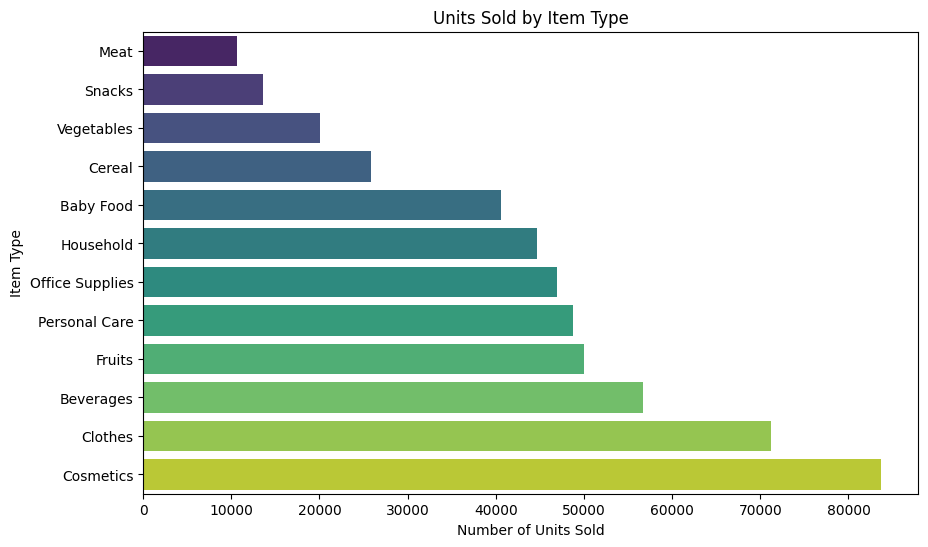

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=units_sold_by_item.values, y=units_sold_by_item.index, palette="viridis")
plt.title('Units Sold by Item Type')
plt.xlabel('Number of Units Sold')
plt.ylabel('Item Type')
plt.show()

In [17]:
amz_sales_data_df.isnull().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64

In [18]:
amz_sales_data_df['country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [19]:
amz_sales_data_df.dropna(subset=['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit'],inplace=True)

In [20]:
amz_sales_data_df.isnull().sum()

region            0
country           0
item_type         0
sales_channel     0
order_priority    0
order_date        0
order_id          0
ship_date         0
units_sold        0
unit_price        0
unit_cost         0
total_revenue     0
total_cost        0
total_profit      0
dtype: int64